节假日长假景点人满为患的数据分析

通过对电影文件（dianying.csv）中的电影票房、导演票房、电影类型、导演与电影类型等的统计，综合运用文件读取、pandas数据处理和matplotlib绘图功能，全面掌握Python程序设计与数据处理方法，从而使读者具备大数据处理的基本能力。

## 1 分析目标
1、哪些城市/省份的旅游选择最多？

2、哪些城市最受游客青睐？

3、最热门的景点

4、各省份的好评热门景点

5、很热门但是评分不好的景点

6、打折力度最大的景点

7、各级别景区的门票价格

## 2 分析内容
景点文件（jingdian.csv）中包含“省份”“城市”、“折扣价格”、“总销量”、“月销量”、“评分”、“标题”、“主演”、“类型”、“票房”、“城市”信息。首先读取全部信息去重；然后提前需要的信息并进行去空处理；接着对提取的干净信息进行统计分析；最后生成相应的图。

景点人数数据信息分析

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#设置中文标签的显示
plt.rcParams['font.sans-serif'] = ['SimHei']  #设置显示中文字体

In [2]:
#读取csv中的数据，以“，”作为分隔符来添加字段名
datas= pd.read_csv('data.csv', delimiter=',', encoding='utf8')
datas.head()

,_id,city,fields.cityName,fields.comment,fields.discountPrice,fields.distance,fields.features,fields.featuresNew,fields.fromName,fields.h5_url,...,fields.sold365,fields.soldRecent,fields.soldRecentNum,fields.subTitle,fields.tagList,fields.title,fields.titleTagInfos,fields.type,src,trip_main_busness_type
0,5cc7189f64eeab7d62a51c94,石家庄,NaN,NaN,81.2,NaN,"[{'key': '一句话描述', 'text': '千奇百怪的珊瑚，还能亲密触碰浅海动物，...",NaN,NaN,NaN,...,NaN,已售104笔,104,NaN,"[{'text': '5A景区', 'icon': None, 'borderColor':...",石家庄海洋公园,[],NaN,mix,scenic
1,5cc718a064eeab7d62a51c95,石家庄,NaN,NaN,35.9,NaN,"[{'key': '一句话描述', 'text': '依据中国古典文学名著《红楼梦》严格设计...",NaN,NaN,NaN,...,NaN,已售336笔,336,NaN,"[{'text': 'AAA', 'icon': None, 'borderColor': ...",荣国府,[],NaN,mix,scenic
2,5cc718a064eeab7d62a51c96,石家庄,NaN,NaN,150.0,NaN,"[{'key': '一句话描述', 'text': '玻璃吊桥很刺激，空中漫步趟过峡谷的体验...",NaN,NaN,NaN,...,NaN,已售65笔,65,NaN,"[{'text': '5A景区', 'icon': None, 'borderColor':...",红崖谷,[],NaN,mix,scenic
3,5cc718a064eeab7d62a51c97,石家庄,NaN,NaN,148.0,NaN,"[{'key': '一句话描述', 'text': '享受温泉沐浴的同时，还能畅玩水上乐园，...",NaN,NaN,NaN,...,NaN,已售162笔,162,NaN,"[{'text': '4A景区', 'icon': None, 'borderColor':...",白鹿温泉,[],NaN,mix,scenic
4,5cc718a064eeab7d62a51c98,石家庄,NaN,NaN,164.0,NaN,"[{'key': '一句话描述', 'text': '参观小动物的同时还能体验跳楼机等各种刺...",NaN,NaN,NaN,...,NaN,已售246笔,246,NaN,[],辛玛王国,[],NaN,mix,scenic


### 1. 清洗数据
#### 1.1 把需要的字段挑出来

In [3]:
#返回列
datas.columns

Index(['_id', 'city', 'fields.cityName', 'fields.comment',
       'fields.discountPrice', 'fields.distance', 'fields.features',
       'fields.featuresNew', 'fields.fromName', 'fields.h5_url',
       'fields.itemId', 'fields.itemTotalScore', 'fields.latitude',
       'fields.longitude', 'fields.native_url', 'fields.p_score',
       'fields.pc_url', 'fields.picUrl', 'fields.price', 'fields.scm',
       'fields.shortInfo', 'fields.sold365', 'fields.soldRecent',
       'fields.soldRecentNum', 'fields.subTitle', 'fields.tagList',
       'fields.title', 'fields.titleTagInfos', 'fields.type', 'src',
       'trip_main_busness_type'],
      dtype='object')

In [56]:
#提取20行的数据
datas.iloc[20]

city                    石家庄
评论量                      12
折扣价                     148
产品特征            21:00前可订今日票
ID              -1587993327
评分                        5
原价                      148
城市                      石家庄
年销量                     142
月销量                      39
星级                     None
项目名     bai lu wen quan 大门票
Name: 20, dtype: object

'city', 城市
'fields.comment',评论
 'fields.discountPrice', 折扣价格
'fields.features', 产品特点
'fields.itemId',编号
'fields.itemTotalScore', 评分
'fields.latitude', 纬度
'fields.longitude', 经度
'fields.price',原价
 'fields.shortInfo',城市
 'fields.sold365', 年销量
'fields.soldRecentNum', 月销数字
'fields.tagList', 特征
'fields.title', 标题
'trip_main_busness_type类型

In [5]:
col_keep = ['city', 'fields.comment', 'fields.discountPrice', 'fields.features', 'fields.itemId','fields.itemTotalScore', 'fields.price',
            'fields.shortInfo', 'fields.sold365', 'fields.soldRecentNum', 'fields.tagList', 'fields.title']

datas= datas[col_keep]

In [25]:
datas.columns = ['city', '评论量', '折扣价', '产品特征','ID','评分','原价','城市','年销量','月销量','星级','项目名']

In [7]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54675 entries, 0 to 54674
Data columns (total 12 columns):
市       54675 non-null object
评论量     50187 non-null float64
折扣价     54675 non-null float64
产品特征    54675 non-null object
ID      54675 non-null int64
评分      50187 non-null float64
原价      54675 non-null float64
城市      50187 non-null object
年销量     32193 non-null object
月销量     54675 non-null int64
星级      54675 non-null object
项目名     54675 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 5.0+ MB


In [8]:
#随机抽取5个元素，并以list形式返回。
datas.head()

,市,评论量,折扣价,产品特征,ID,评分,原价,城市,年销量,月销量,星级,项目名
0,石家庄,NaN,81.2,"[{'key': '一句话描述', 'text': '千奇百怪的珊瑚，还能亲密触碰浅海动物，...",22189,NaN,81.2,NaN,NaN,104,"[{'text': '5A景区', 'icon': None, 'borderColor':...",石家庄海洋公园
1,石家庄,NaN,35.9,"[{'key': '一句话描述', 'text': '依据中国古典文学名著《红楼梦》严格设计...",2091,NaN,35.9,NaN,NaN,336,"[{'text': 'AAA', 'icon': None, 'borderColor': ...",荣国府
2,石家庄,NaN,150.0,"[{'key': '一句话描述', 'text': '玻璃吊桥很刺激，空中漫步趟过峡谷的体验...",24408,NaN,150.0,NaN,NaN,65,"[{'text': '5A景区', 'icon': None, 'borderColor':...",红崖谷
3,石家庄,NaN,148.0,"[{'key': '一句话描述', 'text': '享受温泉沐浴的同时，还能畅玩水上乐园，...",1221,NaN,148.0,NaN,NaN,162,"[{'text': '4A景区', 'icon': None, 'borderColor':...",白鹿温泉
4,石家庄,NaN,164.0,"[{'key': '一句话描述', 'text': '参观小动物的同时还能体验跳楼机等各种刺...",3995,NaN,164.0,NaN,NaN,246,[],辛玛王国


1.2 去重

In [9]:
#输出去重前的行数
print('去重前数据行数：', len(datas))

去重前数据行数： 54675


In [10]:
#subset： 列名，可选，默认为None； inplace=True表示直接在原来的Data上删除重复项
datas=datas.drop_duplicates(subset='ID')

#输出去重后的行数
print('去重后数据行数：', len(datas))

#查看去重后的数据
datas.head()

去重后数据行数： 48537


,市,评论量,折扣价,产品特征,ID,评分,原价,城市,年销量,月销量,星级,项目名
0,石家庄,NaN,81.2,"[{'key': '一句话描述', 'text': '千奇百怪的珊瑚，还能亲密触碰浅海动物，...",22189,NaN,81.2,NaN,NaN,104,"[{'text': '5A景区', 'icon': None, 'borderColor':...",石家庄海洋公园
1,石家庄,NaN,35.9,"[{'key': '一句话描述', 'text': '依据中国古典文学名著《红楼梦》严格设计...",2091,NaN,35.9,NaN,NaN,336,"[{'text': 'AAA', 'icon': None, 'borderColor': ...",荣国府
2,石家庄,NaN,150.0,"[{'key': '一句话描述', 'text': '玻璃吊桥很刺激，空中漫步趟过峡谷的体验...",24408,NaN,150.0,NaN,NaN,65,"[{'text': '5A景区', 'icon': None, 'borderColor':...",红崖谷
3,石家庄,NaN,148.0,"[{'key': '一句话描述', 'text': '享受温泉沐浴的同时，还能畅玩水上乐园，...",1221,NaN,148.0,NaN,NaN,162,"[{'text': '4A景区', 'icon': None, 'borderColor':...",白鹿温泉
4,石家庄,NaN,164.0,"[{'key': '一句话描述', 'text': '参观小动物的同时还能体验跳楼机等各种刺...",3995,NaN,164.0,NaN,NaN,246,[],辛玛王国


#### 1.3 数据类型转换

In [11]:
# 由于np.nan是float，所以这里整体转换为float
datas.loc[datas['评论量'].isnull(), '评论量'] = np.nan
datas['评论量'] = datas['评论量'].astype(float)

In [13]:
datas['折扣价'] = datas['折扣价'].astype(float)
datas['ID'] = datas['ID'].astype(int)
datas['原价'] = datas['原价'].astype(float)
datas['月销量'] = datas['月销量'].astype(int)

#### 1.4 各字段清洗
- fields.features  产品特点
- fields.sold365 年销量
- fields.tagList 特征

In [14]:
def get_fea_text(data):
    if len(data) > 0:
        d=eval(data)#把字符串类型的字典内容转为字典类型
        if d:#如果字典d不为空
            return d[0]['text']#就返回text值
        else:
            return None
    else:
        return None

In [15]:
#清洗前的产品特征
datas['产品特征'].head()

0    [{'key': '一句话描述', 'text': '千奇百怪的珊瑚，还能亲密触碰浅海动物，...
1    [{'key': '一句话描述', 'text': '依据中国古典文学名著《红楼梦》严格设计...
2    [{'key': '一句话描述', 'text': '玻璃吊桥很刺激，空中漫步趟过峡谷的体验...
3    [{'key': '一句话描述', 'text': '享受温泉沐浴的同时，还能畅玩水上乐园，...
4    [{'key': '一句话描述', 'text': '参观小动物的同时还能体验跳楼机等各种刺...
Name: 产品特征, dtype: object

In [16]:
#清洗
datas['产品特征'] = datas['产品特征'].apply(get_fea_text)

#清洗后的产品特征
datas['产品特征'].head()

0    千奇百怪的珊瑚，还能亲密触碰浅海动物，孩子扒在玻璃上不肯走。
1           依据中国古典文学名著《红楼梦》严格设计建造的。
2          玻璃吊桥很刺激，空中漫步趟过峡谷的体验值得一试。
3       享受温泉沐浴的同时，还能畅玩水上乐园，夏季消暑很适合。
4           参观小动物的同时还能体验跳楼机等各种刺激项目。
Name: 产品特征, dtype: object

In [17]:
#清洗前的星级数据
datas['星级'].head()

0    [{'text': '5A景区', 'icon': None, 'borderColor':...
1    [{'text': 'AAA', 'icon': None, 'borderColor': ...
2    [{'text': '5A景区', 'icon': None, 'borderColor':...
3    [{'text': '4A景区', 'icon': None, 'borderColor':...
4                                                   []
Name: 星级, dtype: object

In [18]:
#清洗
datas['星级'] = datas['星级'].apply(get_fea_text)

#清洗后的星级数据
datas['星级'].head()

0    5A景区
1     AAA
2    5A景区
3    4A景区
4    None
Name: 星级, dtype: object

In [19]:
#清洗前的年销量数据
datas['年销量'].sample(5)

22526      NaN
31339    已售28笔
12470      NaN
5102      已售9笔
50140      NaN
Name: 年销量, dtype: object

In [20]:
# fields.sold365清洗
def get_sold365(data):
    if data is np.nan:
        return np.nan
    if "万" in data:
        return float(data[data.find('售')+1:data.find('万')]) * 10000
    else:
        return float(data[data.find('售')+1:data.find('笔')])

    
datas['年销量'] = datas['年销量'].apply(get_sold365)

#清洗后的年销量数据
datas['年销量'].sample(5)


5887     49.0
28121    12.0
33560    24.0
32814     3.0
16456    17.0
Name: 年销量, dtype: float64

#### 1.5 跟省份数据合并在一起

In [21]:
#打开文件
city_data = pd.read_csv('city_data.csv')

In [31]:
#读出标题
city_data.head()

,city,省份
0,石家庄,河北省
1,邯郸,河北省
2,唐山,河北省
3,保定,河北省
4,秦皇岛,河北省


In [30]:
city_data.columns = ['city', '省份']

In [32]:
#连接文件
data_final = datas.merge(city_data, on='city')

In [33]:
#随机抽调查看结果
data_final

,city,评论量,折扣价,产品特征,ID,评分,原价,城市,年销量,月销量,星级,项目名,省份
0,石家庄,NaN,81.2,千奇百怪的珊瑚，还能亲密触碰浅海动物，孩子扒在玻璃上不肯走。,22189,NaN,81.2,NaN,NaN,104,5A景区,石家庄海洋公园,河北省
1,石家庄,NaN,35.9,依据中国古典文学名著《红楼梦》严格设计建造的。,2091,NaN,35.9,NaN,NaN,336,AAA,荣国府,河北省
2,石家庄,NaN,150.0,玻璃吊桥很刺激，空中漫步趟过峡谷的体验值得一试。,24408,NaN,150.0,NaN,NaN,65,5A景区,红崖谷,河北省
3,石家庄,NaN,148.0,享受温泉沐浴的同时，还能畅玩水上乐园，夏季消暑很适合。,1221,NaN,148.0,NaN,NaN,162,4A景区,白鹿温泉,河北省
4,石家庄,NaN,164.0,参观小动物的同时还能体验跳楼机等各种刺激项目。,3995,NaN,164.0,NaN,NaN,246,None,辛玛王国,河北省
5,石家庄,NaN,97.0,水上过山车上尖叫声连连，还有模拟漂流、冲浪水上项目嗨不停。,5396,NaN,97.0,NaN,NaN,157,4A景区,天山海世界,河北省
6,石家庄,NaN,56.9,爬山的运动量适中，地下罗汉堂一定要看啊，场景很震撼。,1685,NaN,56.9,NaN,NaN,20,4A景区,抱犊寨,河北省
7,石家庄,NaN,117.6,和可爱的小动物亲密互动，鹦鹉表演也很好看，孩子们非常开心。,24485,NaN,117.6,NaN,NaN,59,None,萌宠奇缘,河北省
8,石家庄,NaN,59.0,这里有“沕水瀑布天上降”的盛誉，山峦叠嶂，道路弯弯曲曲很有感觉。,1512,NaN,59.0,NaN,NaN,8,4A景区,沕沕水,河北省
9,石家庄,NaN,148.0,非常安静的度假小镇，各色汤池任你选。,1479,NaN,148.0,NaN,NaN,13,4A景区,国御温泉,河北省


In [35]:
#保存结果文件
data_final.to_csv('已清洗完成的数据.csv', index=False)

In [34]:
#查看文件信息
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48537 entries, 0 to 48536
Data columns (total 13 columns):
city    48537 non-null object
评论量     44643 non-null float64
折扣价     48537 non-null float64
产品特征    48332 non-null object
ID      48537 non-null int32
评分      44643 non-null float64
原价      48537 non-null float64
城市      44643 non-null object
年销量     28057 non-null float64
月销量     48537 non-null int32
星级      1743 non-null object
项目名     48537 non-null object
省份      48537 non-null object
dtypes: float64(5), int32(2), object(6)
memory usage: 4.8+ MB


### 问题
1. 哪些城市/省份的旅游选择最多？
2. 哪些城市最受游客青睐？
3. 最热门的景点
4. 各省份的好评热门景点
5. 很热门但是评分不好的景点
6. 打折力度最大的景点
7. 各级别景区的门票价格

#### 1. 哪些城市/省份的旅游选择最多？

In [36]:
#查看0到12列中fields.shortInfo列有多少个不同值，并计算每个不同值有在该列中有多少重复值。
#取选择人数最多的前十二个城市的数据
count_top12 = data_final['城市'].value_counts()[:12]

In [37]:
from pyecharts.charts import Funnel
from pyecharts.faker import Faker
from pyecharts import options as opts
funnel=(Funnel(init_opts=opts.InitOpts(page_title="旅游选择最多的前12个城市"))
        .set_global_opts(title_opts=opts.TitleOpts(title="旅游选择最多的前12个城市"))
        .add("",[list(z) for z in zip(count_top12.index.tolist(),count_top12.values.tolist())])
       )
funnel.render("旅游选择最多的前12个城市.html")
funnel.render_notebook()

In [38]:
#查看data_final中province列有多少个不同值并计算每个不同值有在该列中有多少重复值
count_province_top10 = data_final['省份'].value_counts()

In [39]:
#返回各地的旅游人数
count_province_top10

广东省         4943
浙江省         4688
海南省         3907
江苏省         3889
山东省         2853
福建省         2818
广西壮族自治区     2391
湖北省         2106
北京市         1658
安徽省         1610
四川省         1548
云南省         1541
辽宁省         1480
河北省         1403
上海市         1358
河南省         1313
江西省         1255
陕西省         1104
重庆市          955
香港           923
湖南省          778
澳门           644
黑龙江省         604
甘肃省          467
天津市          430
贵州省          368
山西省          364
宁夏回族自治区      305
吉林省          271
内蒙古自治区       151
台湾           142
西藏自治区        141
新疆维吾尔自治区      90
青海省           39
Name: 省份, dtype: int64

In [40]:
#规范返回数据，用省，市代替“ ”
province = [pro.replace("省", "") for pro in list(count_province_top10.index)]
province = [pro.replace("市", "") for pro in province]

In [41]:
#
province = ['广东','浙江','海南','江苏','山东','福建','广西','湖北','北京','安徽','四川','云南',
            '辽宁','河北','上海','河南','江西','陕西','重庆','香港','湖南','澳门','黑龙江','甘肃',
            '天津','贵州','山西','宁夏','吉林','内蒙古','台湾','西藏',
            '新疆','青海']

In [42]:
from pyecharts.charts import Map#地图
map=(Map(init_opts=opts.InitOpts(page_title="全国各省份旅游选择数量图"))
    .add("", [list(z) for z in zip(province, count_province_top10.values.tolist())], "china")
    .set_global_opts(title_opts=opts.TitleOpts(title="全国各省份旅游选择数量图"),visualmap_opts=opts.VisualMapOpts(max_=5000))
)
map.render("全国各省份旅游选择数量图.html")
map.render_notebook()

#### 2. 哪些城市最受游客青睐？

In [43]:
#分组求和并返回值最大的前十行数据
city_sale_top10 = data_final.groupby('城市')['月销量'].sum().nlargest(10)

In [44]:
from pyecharts.charts import Bar#柱状图
bar=(
    Bar(init_opts=opts.InitOpts(page_title="最近一个月售出门票Top10城市"))
    .set_global_opts(title_opts=opts.TitleOpts(title="最近一个月售出门票Top10城市"))
    .add_xaxis(city_sale_top10.index.tolist())
    .add_yaxis("",city_sale_top10.values.tolist())
)
bar.render("最近一个月售出门票Top10城市.html")
bar.render_notebook()

In [45]:
#分组求和并输出已售量最大的前十行的数据
data_final.groupby('城市')['月销量'].sum().nlargest(10)

城市
杭州    170324
上海    130630
北京     64395
香港     55927
广州     45164
无锡     38172
常州     32728
苏州     32124
三亚     31851
南京     29745
Name: 月销量, dtype: int32

In [46]:
#将评分大于0，评价数大于30的数据按shortInfo列分组，并统计评分的次数
city_favor_count = data_final[(data_final['评分'] > 0)&
                              (data_final['评论量'] > 30)
                             ].groupby('城市')['评分'].count()

In [47]:
#将城市喜欢次数大于三十的数据排序，作为城市质量的值
city_qual = list(city_favor_count[city_favor_count > 30].index)

In [48]:
#将评分大于0评价数大于30的city_qual中的值对应的数据按shortinfo分组并返回其评分最大的20条数据
city_favor_top10 = data_final[(data_final['评分'] > 0)&
                              (data_final['评论量'] > 30)&
                              (data_final['城市'].isin(city_qual))
                             ].groupby('城市')['评分'].mean().nlargest(20)

In [49]:
from pyecharts.charts import WordCloud#词云图
name, value = city_favor_top10.index, city_favor_top10.values*10-30
c=(WordCloud(init_opts=opts.InitOpts(page_title="最近一个月售出门票Top10城市词云图"))
    .add(series_name="热点分析", data_pair=[list(z) for z in zip(name.tolist(),value.tolist())], word_size_range=[6, 66])
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="最近一个月售出门票Top10城市词云图", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True)
    ))
c.render("最近一个月售出门票Top10城市词云图.html")
c.render_notebook()

#### 3. 最热门的景点

In [50]:
#根据月销量排降序，返回前十二条数据的项目名和月销量
data_final.sort_values(by='月销量', 
                      ascending=False)[:12][['项目名', '月销量']]

,项目名,月销量
44567,上海迪士尼度假区,227123
8162,灵隐飞来峰,119349
8285,【当天可订 官方品质】杭州西湖灵隐飞来峰（不含灵隐寺） 门票,117729
46880,香港迪士尼乐园,75092
42479,故宫博物院,50138
25585,广州长隆野生动物世界,41234
29091,珠海长隆海洋王国,34822
14184,九华山,29984
44571,上海野生动物园,25642
25587,广州长隆国际大马戏,25421


In [51]:
most_popular = ['灵隐飞来峰', '上海迪士尼', '香港迪士尼', '广州长隆', '故宫博物院',
               '珠海长隆', '九华山', '上海野生动物园', '东方明珠', '乌镇']
most_popular_values = [119349+117729, 227123, 75092, 41234+25421, 50138,
                      34822, 29984, 25642, 24243, 19557]
bar=(
    Bar(init_opts=opts.InitOpts(page_title="最热门的10个景点"))
    .set_global_opts(title_opts=opts.TitleOpts(title="最热门的10个景点"))
    .add_xaxis(most_popular)
    .add_yaxis("",most_popular_values)
)
bar.render("最热门的10个景点.html")
bar.render_notebook()

#### 4. 各省份的好评热门景点

In [52]:
#随机选取2条数据并保存为list
datas.sample(2)

,city,评论量,折扣价,产品特征,ID,评分,原价,城市,年销量,月销量,星级,项目名
9405,杭州,15.0,268.0,17:00前可订今日票,159328989,5.0,268.0,杭州,139.0,111,None,送氧吧 杭州千岛湖旅游门票 天迹热气球 150米高空之旅 休闲度假
17082,厦门,0.0,198.0,最早可定明日票,1215267896,0.0,198.0,厦门,NaN,0,None,厦门游艇体验票 游艇票 帆船


In [53]:
#调用函数，选取最受欢迎的一条数据
def get_top1(data):
    return data.head(1)

In [54]:
#根据province，评分，销量对数据排降序，排序结果按provience分组，并将分组好的数据依次传入get_top1后重置标题，销售量和评分的索引
province_top1 = data_final.sort_values(by=['省份', '评分', '月销量'], 
                      ascending=False).groupby('省份').apply(get_top1)[['项目名', '月销量', '评分']].reset_index()
#删除level列，并使其原数组不变
province_top1.drop(columns = 'level_1', inplace=True)

province_top1

,省份,项目名,月销量,评分
0,上海市,✅上海迪士尼乐门票 上海迪士尼乐园门票1日票 迪斯尼,9022,5.0
1,云南省,昆明青鱼湾水上乐园门票 青鱼湾【现买现用·秒出票】一票通玩,543,5.0
2,内蒙古自治区,【超值体验】内蒙古旅游鄂尔多斯草原演绎套票,16,5.0
3,北京市,【官方直营】北京古北水镇国际旅游度假区全天门票-散客全票,4100,5.0
4,台湾,雄狮旅游 台湾台北国立故宫博物院门票二维码电子票儿童免票,123,5.0
5,吉林省,I【自动出票】吉林长春伪满皇宫博物院门票 博物馆门票,125,5.0
6,四川省,✅【即买即用】 成都熊猫基地门票 大熊猫繁育研地究基地大门票,5491,5.0
7,天津市,【官方门票】天津方特欢乐世界门票 刷身份证入园,481,5.0
8,宁夏回族自治区,l【当天可订】 宁夏银川镇北堡西部影视城大门票 华夏西部影城,351,5.0
9,安徽省,【当天可订】宏村门票 安徽黄山宏村优惠票 宏村团队 黄山旅游,3070,5.0


In [55]:
#根据“销售数量”列对数据排升序
province_top1.sort_values(by='月销量', ascending=False)

,省份,项目名,月销量,评分
19,浙江省,【当天可订 官方品质】杭州西湖灵隐飞来峰（不含灵隐寺） 门票,117729,5.0
0,上海市,✅上海迪士尼乐门票 上海迪士尼乐园门票1日票 迪斯尼,9022,5.0
15,江苏省,【当天可订|自动出票】南京总统府景区门票南京总统府门票电子票,6924,5.0
6,四川省,✅【即买即用】 成都熊猫基地门票 大熊猫繁育研地究基地大门票,5491,5.0
30,陕西省,西安旅游 西安兵马俑博物馆门票 兵马俑门票兵马俑大门票秦始皇陵,5307,5.0
25,福建省,【官方旗舰店】菽庄花园门票成人票 厦门鼓浪屿景区景点门票飞猪,4576,5.0
3,北京市,【官方直营】北京古北水镇国际旅游度假区全天门票-散客全票,4100,5.0
20,海南省,免抱佛脚随时出票三亚南山寺门票+电瓶车南海观音南山海南旅游,4080,5.0
28,辽宁省,【四馆套票】辽宁大连圣亚海洋世界公园极地馆旅游景区景点门票,4049,5.0
10,山东省,【免取票电子票】山东德州济南泉城海洋极地世界旅游景区景点门票,3613,5.0


#### 5. 热门但是评分不太高的景点

In [57]:
#输出月销量大于100，总分大于0小于4.5的以下四列数据
data_final[(data_final['月销量']>100)&
          (data_final['评分']<4.5)&
          (data_final['评分']>0)][['城市', '项目名', '月销量', '评分']]

,城市,项目名,月销量,评分
2545,大连,【领券立减】大连二〇三樱花园大门票旅顺203樱花成人票扫码入园,118,4.3
7124,无锡,【当天可定】无锡善卷洞门票善卷洞含游船联票大门票成人电子票,760,4.2
8317,杭州,浙江杭州临安风之谷景区门票 户外昌化风之谷门票 杭州接送跟车,199,4.3
22782,武汉,【汉口粤汉码头登船】武汉两江游览船票B线（不含餐）夜游长江游,109,4.3
26939,深圳,ZY【当天可定即定即用】深圳观澜山水田园娱乐套票A 含景区大门票,155,3.8
29856,佛山,顺德长鹿农庄门票 休博园 大门票+游乐金+动物园 单人票/双人票,1001,4.4
29877,佛山,长鹿农庄门票休博园大门票 套票动物园2大2小（不含矿洞海洋馆）,210,4.3
40353,西安,陕西 西安 西安城墙景区 大门票+电子导览,221,4.4
42576,北京,北京昌平第七届北京农业嘉年华大门票 农业嘉年华门票 成人票,112,4.4
46919,香港,Dm香港迪士尼乐园门票1日迪斯尼香港旅游自由行景点电子票不刷单,261,4.3


#### 6. 打折力度最大的景点

In [58]:
#随机抽取2个数据，以list列表返回
datas.sample(2)

,city,评论量,折扣价,产品特征,ID,评分,原价,城市,年销量,月销量,星级,项目名
5314,徐州,125.0,67.0,最早可定明日票,2017890790,4.8,67.0,徐州,826.0,26,None,徐州汉文化景区门票|狮子山楚王陵|汉兵马俑|汉画像石
30021,广州,1.0,88.0,18:00前可订今日票,151485959,5.0,88.0,广州,340.0,0,None,广州珠江夜游 中恒集团号 三楼门票/船票/大沙头码头


In [62]:
#求取折扣，四舍五入保留一位小数
data_final['折扣'] = np.round((1 - (data_final['原价'] - data_final['折扣价'])/data_final['原价'])*10, 1)

In [63]:
#按折扣对数据排序
dis_data = data_final.sort_values(by='折扣')[['折扣价','原价','折扣','项目名','城市']]

In [64]:
#返回前15行数据
dis_data.head(15)

,折扣价,原价,折扣,项目名,城市
28979,13.5,50.00,2.7,ZM【当天可定】广东 东莞南社明清古村落 成人儿童老人观光大门票,东莞
22713,180.0,630.00,2.9,【大学生3人特惠】武汉海昌极地海洋公园门票 海洋世界含萌宠乐园,武汉
29456,598.0,1980.00,3.0,【598元/10次卡】超值钜惠 珠海海泉湾海洋温泉10次卡 可4人使用,珠海
37355,18.0,53.10,3.4,【双人特价 电子票】成都大熊猫基地门票成都大熊猫繁育研究基地,成都
27530,34.5,100.00,3.4,ZY【提前1小时下单】广东 清远田野绿世界 成人儿童老人大门票,清远
30308,36.0,100.00,3.6,ZM【当天可定】广东 阳江闸坡大角湾景区 成人1日景区大门票,阳江
26931,60.0,166.50,3.6,即买即用 索道+缆车】 深圳东部华侨城大侠谷门票 大峡谷亲子家庭,深圳
1004,49.9,135.00,3.7,当日可订 河北 秦皇岛 沙雕海洋乐园门票 沙雕大世界大门票,秦皇岛
30549,20.0,52.99,3.8,【 即买即用】南宁园博园门票 第十二届园博会园博园门票,南宁
30541,21.4,55.00,3.9,【 即买即用】南宁园博园门票 第十二届园博会园博园门票,南宁


In [65]:
#把折扣小于7的对应数据保存到discount.csv文件中，不用排序
dis_data[dis_data['折扣']<7].to_csv('折扣.csv', index=False)

c:\users\love\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 150.0)

c:\users\love\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25240 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\love\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25187 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\love\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25240 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\love\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25187 missing from current font.
  font.set_text(s, 0, flags=flags)


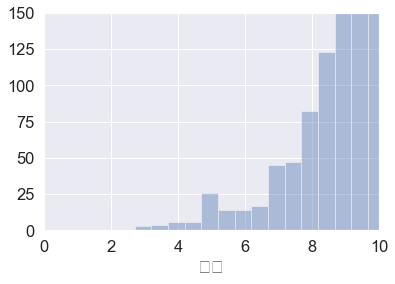

In [69]:
#创建无序不重复的元素集
sns.set(font_scale=1.5)
#输入数据并绘图，kde表示样式
g = sns.distplot(dis_data['折扣'], kde=False)
#设定xy轴的下上限
g.set_xlim(0, 10)
g.set_ylim(0, 150)

In [70]:
#将折扣小于7的数据按shortInfo分组，并按标题统计次数，输出次数最大的五条数据
dis_data[dis_data['折扣']<7].groupby('城市')['项目名'].count().nlargest(5)

城市
桂林    16
上海    12
香港    10
三亚     7
深圳     6
Name: 项目名, dtype: int64

#### 7. 各级别景区的门票价格

In [71]:
#随机选取5条数据并保存为list
data_final.sample(5)

,city,评论量,折扣价,产品特征,ID,评分,原价,城市,年销量,月销量,星级,项目名,省份,discount,折扣
27339,清远,7.0,116.0,22:30前可订今日票,-1754139963,5.0,116.0,清远,82.0,6,None,【无需换票】广东 清远 熹乐谷温泉度假酒店温泉 温泉票广东景区Q,广东省,10.0,10.0
29217,珠海,NaN,79.0,参加各种欢乐刺激的游乐设施，欣赏充满异国风情的特色表演秀。,23889,NaN,79.0,NaN,NaN,33,5A景区,神秘岛主题乐园,广东省,10.0,10.0
31720,桂林,2.0,140.0,15:30前可订今日票,-974978977,5.0,140.0,桂林,2.0,1,None,广西 桂林 刘三姐大观园 电子票 当天可订 下单30分钟生效,广西壮族自治区,10.0,10.0
2683,大连,NaN,98.0,呼吸清新空气，享受着自然融合的泡泉体验，感觉太舒服了。,174,NaN,98.0,NaN,NaN,8,None,旅顺天沐温泉,辽宁省,10.0,10.0
42718,北京,35.0,65.0,13:15前可订今日票,-636743729,5.0,65.0,北京,5398.0,1604,None,北京颐和园大门票+佛香阁+苏州街+德和园+文昌院赠送电子导览,北京市,10.0,10.0


In [72]:
level = ['A', 'AA', 'AAA', '4A景区', '5A景区']
#将数据按taglist分组，并求其价格的均值划分等级
level_data = data_final.groupby('星级')['原价'].mean()[level]

In [73]:
#将数据按taglist分组，并求其价格的均值
data_final.groupby('星级')['原价'].mean()

星级
4A景区     79.781033
5A景区    121.984286
A        72.377778
AA       71.005000
AAA      53.908148
今日可用    162.322308
山        95.000000
明日可用    158.617455
景点      142.800000
演出      276.666667
赛事      150.000000
Name: 原价, dtype: float64

In [74]:
level_data

星级
A        72.377778
AA       71.005000
AAA      53.908148
4A景区     79.781033
5A景区    121.984286
Name: 原价, dtype: float64

In [75]:
bar=(
    Bar(init_opts=opts.InitOpts(page_title="各级别景区的门票价格"))
    .set_global_opts(title_opts=opts.TitleOpts(title="各级别景区的门票价格"))
    .add_xaxis(level_data.index.tolist())
    .add_yaxis("",np.round(level_data.values,0).tolist())
)
bar.render("各级别景区的门票价格.html")
bar.render_notebook()